PROJET VENTES

Importation et Netoyage des données

In [2]:
# importation des package
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#IMPORTER ET COMBINER LES DONNEES

# Spécifie le dossier contenant les fichiers CSV
dossier = 'C:/Users/cellou/Desktop/PROJET PYTHON/data-sales-main'

# Trouve tous les fichiers CSV dans le dossier
fichiers_csv = glob.glob(os.path.join(dossier, '*.csv'))

# Liste pour stocker les DataFrames
liste_df = []

# Boucle sur chaque fichier et lis-le avec pandas
for fichier in fichiers_csv:
    df = pd.read_csv(fichier)
    liste_df.append(df)

# Combine tous les fichiers en un seul DataFrame
df_combine = pd.concat(liste_df, ignore_index=True)

# Affiche les 5 premières lignes
df_combine.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df_combine.sample(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6985,183221,Lightning Charging Cable,1,14.95,04/15/19 08:53,"941 Washington St, Atlanta, GA 30301"
105982,162690,27in FHD Monitor,1,149.99,03/19/19 08:40,"121 7th St, San Francisco, CA 94016"
2380,178834,Wired Headphones,1,11.99,04/10/19 00:25,"728 Dogwood St, Atlanta, GA 30301"
71695,145164,Lightning Charging Cable,1,14.95,01/09/19 19:23,"309 Lakeview St, San Francisco, CA 94016"


In [6]:
df_combine.shape

(186850, 6)

In [7]:
df_combine.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
#Suprimer les lignes et les colonnes vides
df_combine = df_combine.dropna(how='all')
df_combine.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
df_combine.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
df_combine = df_combine[df_combine['Order Date']!='Order Date']
df_combine.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [11]:
df_combine.shape

(185950, 6)

In [12]:
df_combine.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
# Convertir "Quantity Ordered" en entier
df_combine['Quantity Ordered'] = pd.to_numeric(df_combine['Quantity Ordered'], errors='coerce')

# Convertir "Price Each" en float
df_combine['Price Each'] = pd.to_numeric(df_combine['Price Each'], errors='coerce')

# Convertir "Order Date" en datetime
df_combine['Order Date'] = pd.to_datetime(df_combine['Order Date'], errors='coerce')


C:\Users\cellou\AppData\Local\Temp\ipykernel_12700\3419547888.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_combine['Order Date'] = pd.to_datetime(df_combine['Order Date'], errors='coerce')


In [14]:
#création d'une nouvelle colonne sales

df_combine['Sales']= df_combine['Quantity Ordered']*df_combine['Price Each']

# Ajouter une colonne "Month" (numéro du mois)
df_combine['Month'] = df_combine['Order Date'].dt.month

# Ajouter une colonne "Month Name"
df_combine['Month Name'] = df_combine['Order Date'].dt.strftime('%B')

df_combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April


In [15]:
# Ajouter une colonne "Month Name"
df_combine['Month Name'].unique()


array(['April', 'May', 'August', 'September', 'December', 'January',
       'February', 'March', 'July', 'June', 'November', 'October'],
      dtype=object)

In [21]:
# Grouper les ventes par nom du mois
ventes_par_mois = df_combine.groupby('Month Name')['Sales'].sum()
ventes_par_mois

Month Name
January      1822256.73
February     2202022.42
March        2807100.38
April        3390670.24
May          3152606.75
June         2577802.26
July         2647775.76
August       2244467.88
September    2097560.13
October      3736726.88
November     3199603.20
December     4613443.34
Name: Sales, dtype: float64

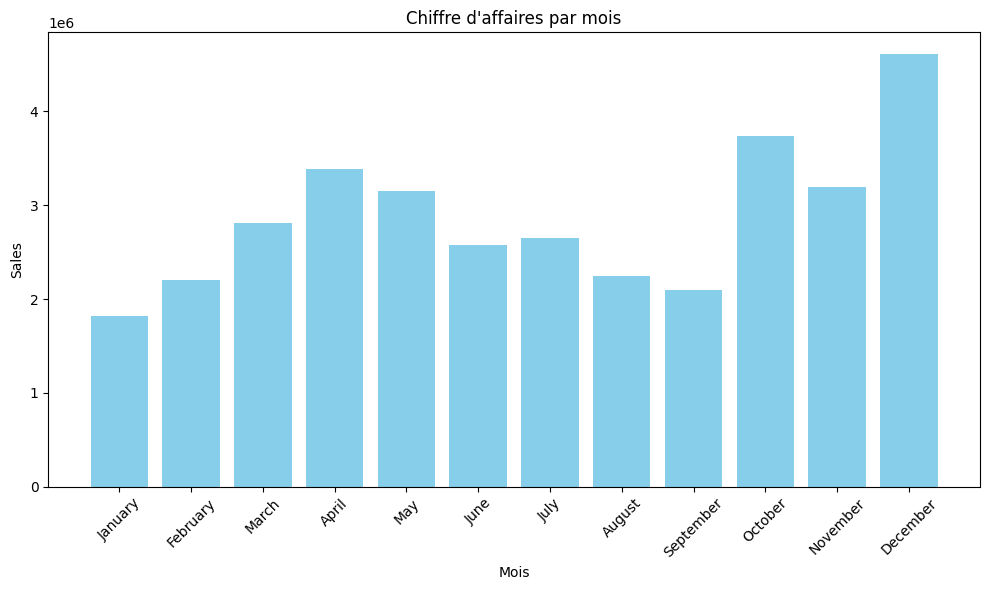

In [22]:
# Réordonner les mois pour l'affichage correct
mois_ordre = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
ventes_par_mois = ventes_par_mois.reindex(mois_ordre)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(ventes_par_mois.index, ventes_par_mois.values, color='skyblue')
plt.title("Chiffre d'affaires par mois")
plt.xlabel("Mois")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\cellou\AppData\Local\Temp\ipykernel_12700\2284423231.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_combine, x='Month Name', y='Sales', estimator=sum, ci=None)


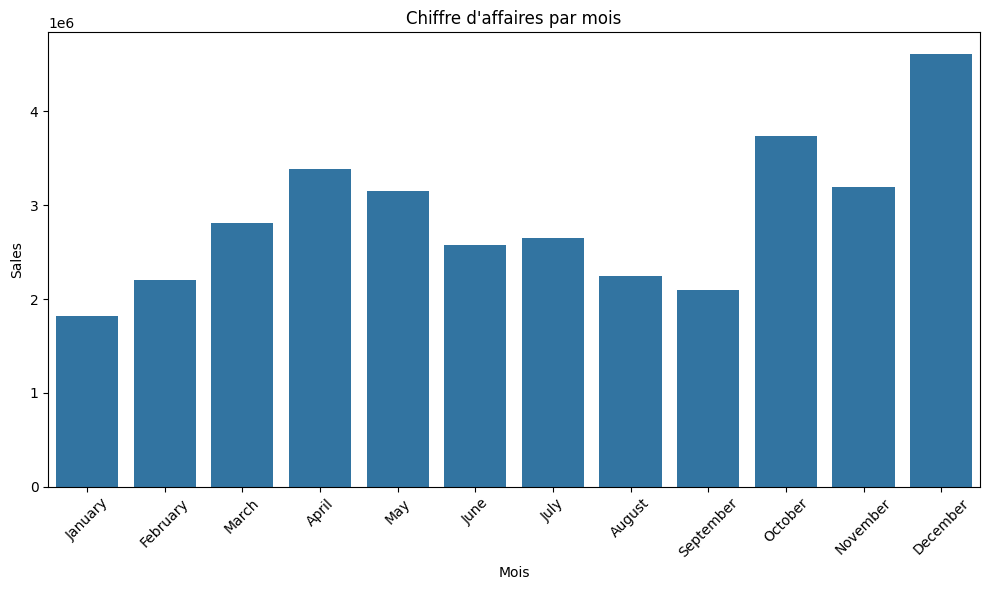

In [17]:
import seaborn as sns

# Créer une colonne avec le mois en format abrégé pour l’ordre
df_combine['Month Name'] = pd.Categorical(
    df_combine['Month Name'],
    categories=mois_ordre,
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_combine, x='Month Name', y='Sales', estimator=sum, ci=None)
plt.title("Chiffre d'affaires par mois")
plt.xlabel("Mois")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
df_combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April


In [19]:
quantite_par_produit = df_combine.groupby('Product')['Quantity Ordered'].sum()
quantite_par_produit

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

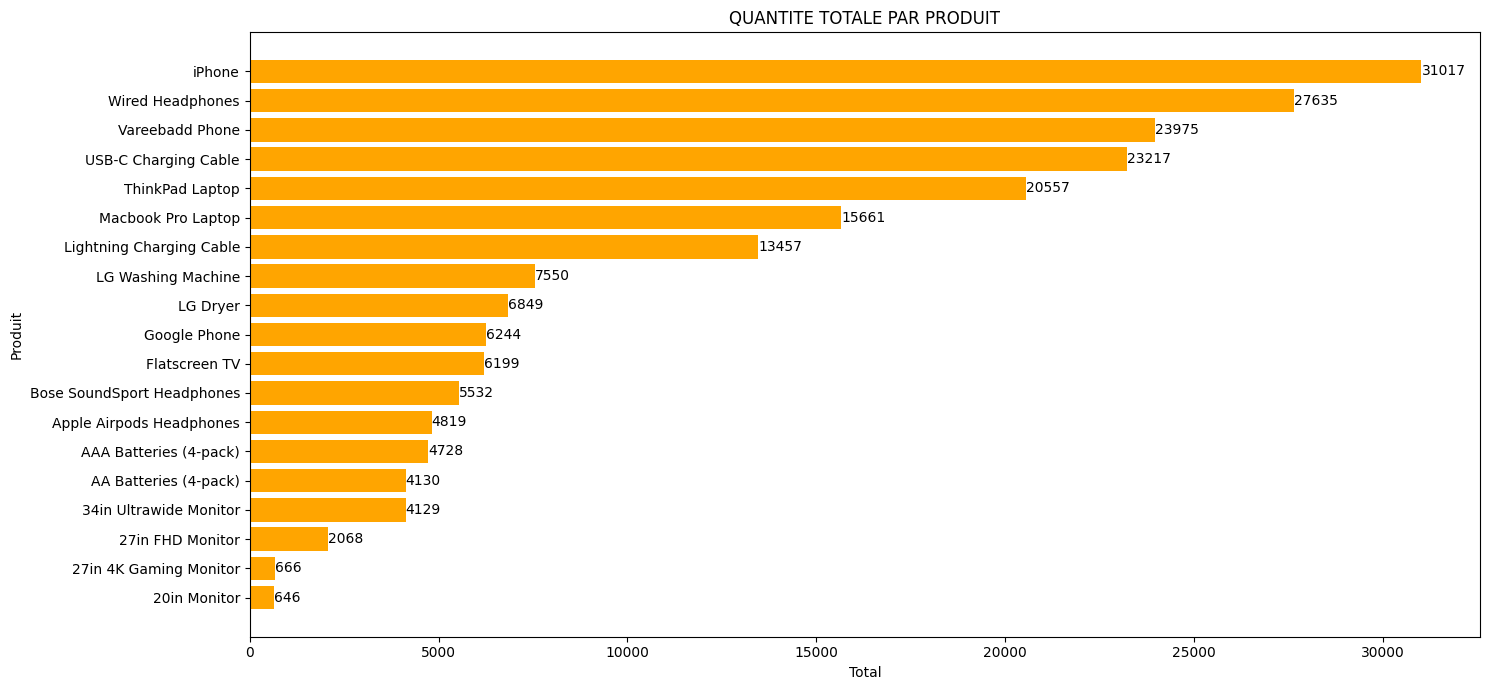

In [20]:
plt.figure(figsize=(15,7))
plt.barh(quantite_par_produit.index,quantite_par_produit.sort_values().values, color ='orange')

# Ajouter les étiquettes à droite des barres
for index, value in enumerate(quantite_par_produit.sort_values().values):
    plt.text(value + 1, index, str(value), va='center')
    
plt.title('QUANTITE TOTALE PAR PRODUIT')
plt.xlabel('Total')
plt.ylabel('Produit')
plt.tight_layout()
plt.show()

In [23]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [26]:
def city(x):
    return x.split(',')[1]

In [29]:
df_combine['City'] = df_combine['Purchase Address'].apply(city)

In [30]:
df_combine['hour']=pd.to_datetime(df_combine['Order Date']).dt.hour

In [31]:
df_combine.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,Los Angeles,9


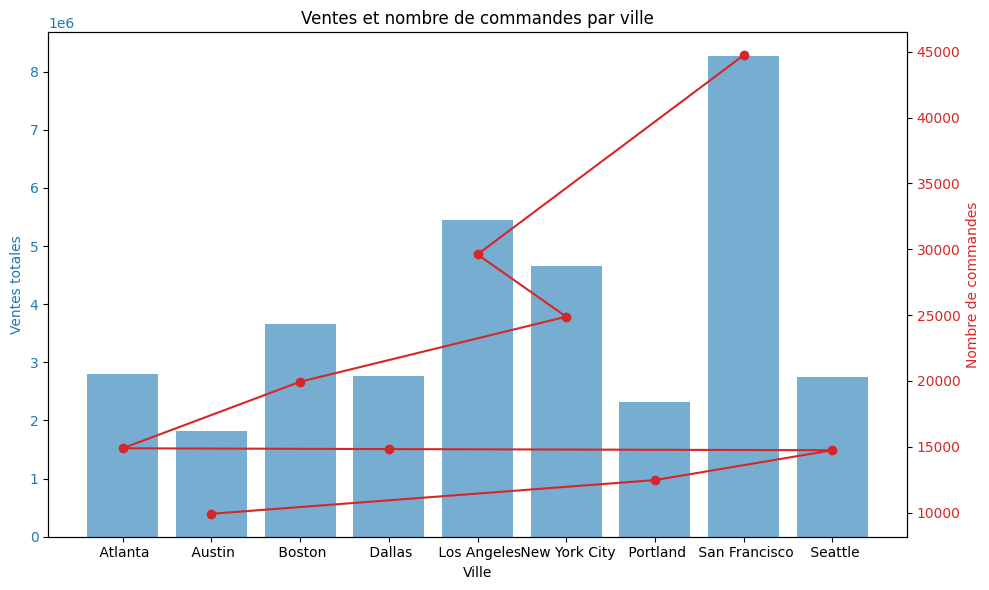

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Regrouper les données par ville
sales_by_city = df_combine.groupby('City')['Sales'].sum()
orders_by_city = df_combine['City'].value_counts()

# Tracer le graphique combiné
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axe 1 - Barres (ventes)
color = 'tab:blue'
ax1.set_xlabel('Ville')
ax1.set_ylabel('Ventes totales', color=color)
ax1.bar(sales_by_city.index, sales_by_city.values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Axe 2 - Ligne (nombre de commandes)
ax2 = ax1.twinx()  # Deuxième axe Y
color = 'tab:red'
ax2.set_ylabel("Nombre de commandes", color=color)
ax2.plot(orders_by_city.index, orders_by_city.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et affichage
plt.title('Ventes et nombre de commandes par ville')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
